In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
from google.colab import files
uploaded = files.upload()
import io
Features = pd.read_csv(io.BytesIO(uploaded['Featuredata.csv']))

Saving Featuredata.csv to Featuredata (1).csv


In [0]:
from google.colab import files
uploaded = files.upload()
import io
KP = pd.read_csv(io.BytesIO(uploaded['KPdata.csv']))

Saving KPdata.csv to KPdata (1).csv


In [0]:
df = pd.concat([KP, Features], axis=1)
df.head(30)

,Date,KP,year,day,hr,min,sec,Np,Tp,Alpha_ratio,Vp,V_rtn_r,V_rtn_t,V_rtn_n,V_gse_x,V_gse_y,V_gse_z,V_gsm_x,V_gsm_y,V_gsm_z,B_rtn_r,B_rtn_t,B_rtn_n,B_gse_x,B_gse_y,B_gse_z,B_gsm_x,B_gsm_y,B_gsm_z,Bmag,pos_gse_x,pos_gse_y,pos_gse_z,pos_gsm_x,pos_gsm_y,pos_gsm_z
0,20601,0,2002.0,152.0,1.000000,29.869048,28.872405,NaN,NaN,NaN,318.833601,318.355030,17.109286,2.411518,-318.379732,-16.812500,0.212619,-318.379732,-15.743839,-6.437321,0.912095,-1.438411,0.889571,-0.910292,1.316577,1.063137,-0.910292,0.962786,1.370280,2.108000,1.540000e+06,219000.000000,-14375.000000,1.540000e+06,214416.666667,46880.952381
1,20601,0,2002.0,152.0,4.000000,29.597633,29.158325,NaN,NaN,NaN,320.478462,319.857337,18.533609,6.667515,-319.885976,-18.758935,4.256479,-319.885976,-18.953550,-1.481183,1.884911,-1.737136,-0.263893,-1.882343,1.759254,-0.043698,-1.882343,1.745083,0.218651,2.815083,1.542663e+06,218467.455621,-13757.396450,1.542663e+06,217798.816568,19964.201183
2,20601,1,2002.0,152.0,7.005917,29.502959,29.536870,NaN,NaN,NaN,332.614349,331.854142,21.616391,2.864142,-331.884763,-21.323639,0.095503,-331.884763,-21.321746,-2.612160,0.399266,-1.667343,1.216893,-0.397189,1.501751,1.416740,-0.397189,1.483485,1.472533,3.081669,1.550000e+06,218000.000000,-13136.686391,1.550000e+06,217911.242604,-8364.547929
3,20601,1,2002.0,152.0,10.000000,29.607143,28.587768,NaN,NaN,NaN,331.287500,330.251429,24.817976,-6.663095,-330.284196,-23.305387,-9.757232,-330.284196,-23.799524,-9.044762,-0.274464,-1.115964,0.921179,0.275827,0.990881,1.054208,0.275827,1.036375,1.007369,2.230702,1.550000e+06,217053.571429,-12520.238095,1.550000e+06,216327.380952,-22761.904762
4,20601,0,2002.0,152.0,12.994083,29.692308,28.778757,NaN,NaN,NaN,318.792929,317.745385,23.566302,-10.266420,-317.775178,-21.630296,-13.173047,-317.775178,-21.649053,-11.069201,0.603663,-1.400751,0.063030,-0.601710,1.382598,0.238556,-0.601710,1.380503,0.215485,2.080852,1.550000e+06,216650.887574,-11902.958580,1.550000e+06,216390.532544,-13833.846154
5,20601,1,2002.0,152.0,16.000000,29.597633,29.158325,NaN,NaN,NaN,321.882929,320.665828,27.647426,-2.179083,-320.704763,-26.692633,-5.662515,-320.704763,-26.022692,-5.833314,0.324361,-2.056462,-0.329361,-0.321379,2.082047,-0.068189,-0.321379,2.106586,0.229355,2.971349,1.550000e+06,216000.000000,-11282.248521,1.550000e+06,215378.698225,16220.391716
6,20601,1,2002.0,152.0,19.005917,29.502959,29.536870,15.141382,28194.117647,0.028960,336.200917,335.320799,20.778728,0.196154,-335.349970,-20.157426,-2.442456,-335.349970,-19.337988,-5.327396,2.375189,-2.834325,-1.451142,-2.370781,2.997781,-1.083284,-2.370781,3.175130,-0.219426,4.843367,1.550000e+06,215213.017751,-10659.171598,1.550000e+06,210118.343195,47692.899408
7,20601,2,2002.0,152.0,22.000000,29.607143,28.587768,19.522396,30309.226190,0.032599,351.533065,351.384196,-2.367976,6.265030,-351.382500,2.063423,6.489911,-351.382500,-0.146964,6.768452,1.428982,3.522970,-4.890554,-1.432744,-2.877696,-5.294994,-1.432744,-1.013298,-5.945143,6.816339,1.550000e+06,214785.714286,-10038.303571,1.550000e+06,206315.476190,59828.571429
8,20602,4,2002.0,153.0,0.994083,29.680473,28.489846,12.019873,84164.792899,0.034897,377.482811,375.346834,-14.074142,-29.984763,-375.319675,18.269822,-27.999586,-375.319675,25.836982,-24.230237,-1.137929,5.771243,-1.535852,1.130225,-5.533757,-2.249663,1.130225,-4.754521,-3.632899,8.917426,1.550000e+06,214000.000000,-9414.733728,1.550000e+06,208502.958580,48938.461538
9,20602,3,2002.0,153.0,4.000000,29.579882,29.222911,9.990908,132960.650888,0.018821,390.362574,387.870976,-27.069172,-28.663107,-387.825740,31.011953,-25.052041,-387.825740,34.559763,-22.898550,-2.704911,4.447142,3.251834,2.697982,-4.824858,2.666562,2.697982,-5.045692,1.877592,8.399290,1.550000e+06,213349.112426,-8791.479290,1.550000e+06,212218.934911,22691.360947


In [0]:
df = df.drop(['year','day','hr','min','sec','Date'],axis=1)

In [0]:
df = df[df['Np'].notna()]

In [0]:
df #

,KP,Np,Tp,Alpha_ratio,Vp,V_rtn_r,V_rtn_t,V_rtn_n,V_gse_x,V_gse_y,V_gse_z,V_gsm_x,V_gsm_y,V_gsm_z,B_rtn_r,B_rtn_t,B_rtn_n,B_gse_x,B_gse_y,B_gse_z,B_gsm_x,B_gsm_y,B_gsm_z,Bmag,pos_gse_x,pos_gse_y,pos_gse_z,pos_gsm_x,pos_gsm_y,pos_gsm_z
6,1.0,15.141382,28194.117188,0.028960,336.200928,335.320801,20.778728,0.196154,-335.349976,-20.157427,-2.442456,-335.349976,-19.337988,-5.327396,2.375189,-2.834326,-1.451142,-2.370781,2.997781,-1.083284,-2.370781,3.175130,-0.219426,4.843367,1550000.0,215213.015625,-10659.171875,1550000.0,210118.343750,47692.898438
7,2.0,19.522396,30309.226562,0.032599,351.533051,351.384186,-2.367976,6.265030,-351.382507,2.063423,6.489911,-351.382507,-0.146964,6.768452,1.428982,3.522970,-4.890553,-1.432744,-2.877697,-5.294994,-1.432744,-1.013298,-5.945143,6.816339,1550000.0,214785.718750,-10038.303711,1550000.0,206315.468750,59828.570312
8,4.0,12.019873,84164.789062,0.034897,377.482819,375.346832,-14.074142,-29.984764,-375.319672,18.269823,-27.999586,-375.319672,25.836983,-24.230236,-1.137929,5.771243,-1.535852,1.130225,-5.533757,-2.249663,1.130225,-4.754521,-3.632900,8.917426,1550000.0,214000.000000,-9414.733398,1550000.0,208502.953125,48938.460938
9,3.0,9.990909,132960.656250,0.018821,390.362579,387.870972,-27.069172,-28.663107,-387.825745,31.011953,-25.052042,-387.825745,34.559765,-22.898550,-2.704911,4.447142,3.251834,2.697982,-4.824858,2.666562,2.697982,-5.045692,1.877592,8.399290,1550000.0,213349.109375,-8791.479492,1550000.0,212218.937500,22691.361328
10,2.0,10.572882,137446.750000,0.016086,392.749237,390.194275,-7.384911,-38.122189,-390.174744,12.677071,-36.910858,-390.174744,13.140296,-38.527309,-4.585982,2.973391,1.393840,4.581468,-3.131615,1.008728,4.581468,-3.177817,0.981994,7.532663,1550000.0,212911.250000,-8168.284180,1550000.0,212733.734375,-4932.979980
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1627,2.0,11.018899,53331.656250,0.061772,460.295044,459.927856,12.981153,-12.611568,-459.937683,-14.363166,-10.662899,-459.937683,-16.193876,-7.644645,7.426284,1.770083,-0.375876,-7.426681,-1.801710,-0.151751,-7.426681,-1.797331,0.203716,7.706438,1540000.0,21213.017578,82683.429688,1540000.0,36935.503906,76958.578125
1628,2.0,10.734403,33015.382812,0.080554,446.319214,445.964661,13.628521,-10.582663,-445.973572,-14.761775,-8.577810,-445.973572,-16.544882,-6.201864,6.608669,2.671053,-1.844870,-6.609929,-2.876154,-1.499734,-6.609929,-3.068059,-1.089237,7.417834,1540000.0,19942.603516,83221.890625,1540000.0,31414.201172,79548.523438
1629,3.0,7.847125,13027.648438,0.119222,436.456146,436.021851,13.348214,-13.678780,-436.031860,-14.867470,-11.689643,-436.031860,-16.040327,-11.127768,6.843321,4.097048,-1.635696,-6.844494,-4.265768,-1.117494,-6.844494,-4.275423,-1.067536,8.178387,1540000.0,18675.595703,83752.976562,1540000.0,19807.142578,83401.789062
1630,2.0,5.893023,9540.207031,0.181260,424.599121,424.277435,7.709142,-14.233402,-424.287292,-9.343225,-12.936332,-424.287292,-8.691154,-13.877929,7.095663,3.860858,-1.327965,-7.096645,-3.993550,-0.841071,-7.096645,-3.857610,-1.297734,8.203503,1540000.0,17408.875000,84278.695312,1540000.0,7270.295898,85691.718750


In [0]:
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
	n_vars = 1 if type(data) is list else data.shape[1]
	df = pd.DataFrame(data)
	cols, names = list(), list()
	# input sequence (t-n, ... t-1)
	for i in range(n_in, 0, -1):
		cols.append(df.shift(i))
		names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
	# forecast sequence (t, t+1, ... t+n)
	for i in range(0, n_out):
		cols.append(df.shift(-i))
		if i == 0:
			names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
		else:
			names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
	# put it all together
	agg = pd.concat(cols, axis=1)
	agg.columns = names
	# drop rows with NaN values
	if dropnan:
		agg.dropna(inplace=True)
	return agg

In [0]:
df = df.astype('float32')
# normalize features
scaler = MinMaxScaler(feature_range=(0, 1))
scaled = scaler.fit_transform(df)
# frame as supervised learning
n_lags = 16
n_features = 30
# frame as supervised learning
reframed = series_to_supervised(scaled, n_lags, 1)
values = reframed.values
n_train_size = 1300
train = values[:n_train_size, :]
test = values[n_train_size:, :]
# split into input and outputs
train_X, train_y = train[:, :-1], train[:, -1]
test_X, test_y = test[:, :-1], test[:, -1]
# reshape input to be 3D [samples, timesteps, features]
train_X = train_X.reshape((train_X.shape[0], 1, train_X.shape[1]))
test_X = test_X.reshape((test_X.shape[0], 1, test_X.shape[1]))
print(train_X.shape, train_y.shape, test_X.shape, test_y.shape)


(1300, 1, 509) (1300,) (310, 1, 509) (310,)


In [0]:
model = Sequential()

model.add(LSTM(units=29, return_sequences= True, input_shape=(train_X.shape[1],train_X.shape[2])))
model.add(LSTM(units=29, return_sequences=True))
model.add(LSTM(units=29))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

In [0]:
model.fit(train_X, train_y, epochs=50 )

Epoch 1/50
1300/1300 [==============================] - 1s 718us/step - loss: 0.1826
Epoch 2/50
1300/1300 [==============================] - 0s 124us/step - loss: 0.0442
Epoch 3/50
1300/1300 [==============================] - 0s 130us/step - loss: 0.0024
Epoch 4/50
1300/1300 [==============================] - 0s 121us/step - loss: 0.0018
Epoch 5/50
1300/1300 [==============================] - 0s 140us/step - loss: 0.0017
Epoch 6/50
1300/1300 [==============================] - 0s 122us/step - loss: 0.0018
Epoch 7/50
1300/1300 [==============================] - 0s 130us/step - loss: 0.0015
Epoch 8/50
1300/1300 [==============================] - 0s 121us/step - loss: 0.0015
Epoch 9/50
1300/1300 [==============================] - 0s 120us/step - loss: 0.0015
Epoch 10/50
1300/1300 [==============================] - 0s 117us/step - loss: 0.0013
Epoch 11/50
1300/1300 [==============================] - 0s 120us/step - loss: 0.0012
Epoch 12/50
1300/1300 [==============================] - 0s 128

In [0]:
testP = model.predict(test_X)

In [0]:
testP = pd.Series(testP.reshape(310,))

In [0]:
pred_df = pd.DataFrame(test_y,columns=['True Y'])
pred_df = pd.concat([pred_df,testP],axis=1)
pred_df.columns = ['True KP', 'Estimated KP']
pred_df.head(60)

,True KP,Estimated KP
0,0.087588,0.099037
1,0.068189,0.080482
2,0.094227,0.106582
3,0.153741,0.150410
4,0.218907,0.230859
5,0.251534,0.271400
6,0.227625,0.246106
7,0.160443,0.181525
8,0.098590,0.121409
9,0.079102,0.093821


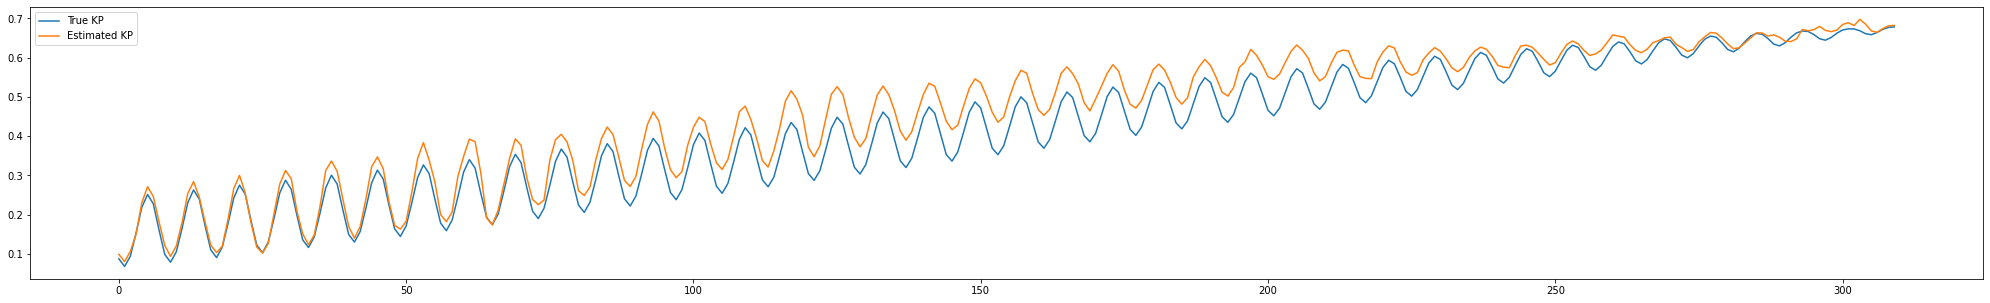

In [115]:
pred_df.plot(figsize=(35,5))